In [1]:
"""

create basic linear regression model for
target of US county 2019 median household income
with numeric features and features already one-hot encoded

Without target transformation or transformation of features

Check model against validation set
Hold out test set 

"""

'\n\ncreate basic linear regression model for\ntarget of US county 2019 median household income\nwith numeric features and features already one-hot encoded\n\nWithout target transformation or transformation of features\n\nCheck model against validation set\nHold out test set \n\n'

In [2]:
import pickle
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt

import scipy.stats as stats

In [3]:
with open('county_model_data.pickle', 'rb') as read_file:
    model_data = pickle.load(read_file)
    
model_data.head()

,FIPS_code,Stabr,area_name,Area_Name,Median_Household_Income_2019,Civilian_labor_force_2019,Unemployment_rate_2019,hwy_count,city_town_counts,Metro_2013,...,Farming_2015_Update,Mining_2015-Update,Manufacturing_2015_Update,Government_2015_Update,Recreation_2015_Update,Nonspecialized_2015_Update,Low_Education_2015_Update,Low_Employment_Cnty_2008_2012_25_64,Retirement_Dest_2015_Update,Persistent_Poverty_2013
0,01001,AL,"Autauga County, AL",Autauga County,58233.0,26172.0,2.7,6.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,01003,AL,"Baldwin County, AL",Baldwin County,59871.0,97328.0,2.7,12.0,14.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,01005,AL,"Barbour County, AL",Barbour County,35972.0,8537.0,3.8,11.0,6.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,01007,AL,"Bibb County, AL",Bibb County,47918.0,8685.0,3.1,8.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,01009,AL,"Blount County, AL",Blount County,52902.0,25331.0,2.7,9.0,16.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [4]:
model_data.columns

Index(['FIPS_code', 'Stabr', 'area_name', 'Area_Name',
       'Median_Household_Income_2019', 'Civilian_labor_force_2019',
       'Unemployment_rate_2019', 'hwy_count', 'city_town_counts', 'Metro_2013',
       'Rural_urban_continuum_code_2013', 'Farming_2015_Update',
       'Mining_2015-Update', 'Manufacturing_2015_Update',
       'Government_2015_Update', 'Recreation_2015_Update',
       'Nonspecialized_2015_Update', 'Low_Education_2015_Update',
       'Low_Employment_Cnty_2008_2012_25_64', 'Retirement_Dest_2015_Update',
       'Persistent_Poverty_2013'],
      dtype='object')

In [5]:
# split df 
X = model_data[['Civilian_labor_force_2019',
       'Unemployment_rate_2019', 'hwy_count', 'city_town_counts', 'Metro_2013',
       'Rural_urban_continuum_code_2013', 'Farming_2015_Update',
       'Mining_2015-Update', 'Manufacturing_2015_Update',
       'Government_2015_Update', 'Recreation_2015_Update',
       'Nonspecialized_2015_Update', 'Low_Education_2015_Update',
       'Low_Employment_Cnty_2008_2012_25_64', 'Retirement_Dest_2015_Update',
       'Persistent_Poverty_2013']]

y = model_data['Median_Household_Income_2019']



In [6]:
y[:10]

0    58233.0
1    59871.0
2    35972.0
3    47918.0
4    52902.0
5    31906.0
6    39944.0
7    47747.0
8    42015.0
9    45982.0
Name: Median_Household_Income_2019, dtype: float64

In [7]:
X[:10]

,Civilian_labor_force_2019,Unemployment_rate_2019,hwy_count,city_town_counts,Metro_2013,Rural_urban_continuum_code_2013,Farming_2015_Update,Mining_2015-Update,Manufacturing_2015_Update,Government_2015_Update,Recreation_2015_Update,Nonspecialized_2015_Update,Low_Education_2015_Update,Low_Employment_Cnty_2008_2012_25_64,Retirement_Dest_2015_Update,Persistent_Poverty_2013
0,26172.0,2.7,6.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,97328.0,2.7,12.0,14.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,8537.0,3.8,11.0,6.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,8685.0,3.1,8.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,25331.0,2.7,9.0,16.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
5,4818.0,3.6,6.0,2.0,0.0,6.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
6,9263.0,3.6,7.0,3.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
7,46209.0,3.5,11.0,9.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8,15748.0,2.9,7.0,6.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
9,11604.0,2.9,7.0,7.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [8]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [9]:
X_train.shape

(1854, 16)

In [10]:
X_val.shape

(619, 16)

In [11]:
X_test.shape

(619, 16)

In [12]:
# Linear Regression Model 

# one train set and one validation set

lr = LinearRegression()

lr.fit(X_train, y_train)

lr.score(X_train, y_train)



0.5108926711097381

In [13]:
lr.score(X_val, y_val) #R2

0.4825581892038294

In [14]:
y_pred = lr.predict(X_val)
np.sqrt(mean_squared_error(y_val, y_pred))

10880.353676347006

In [15]:
sorted(list(zip(X_val.columns, np.round(lr.coef_, 3))), key=lambda x: x[1])

[('Low_Employment_Cnty_2008_2012_25_64', -7771.691),
 ('Persistent_Poverty_2013', -6656.671),
 ('Low_Education_2015_Update', -2174.483),
 ('Unemployment_rate_2019', -1823.455),
 ('Farming_2015_Update', -1691.579),
 ('Manufacturing_2015_Update', -1275.116),
 ('Rural_urban_continuum_code_2013', -1063.562),
 ('Government_2015_Update', -957.364),
 ('Nonspecialized_2015_Update', -311.156),
 ('hwy_count', -96.748),
 ('Civilian_labor_force_2019', 0.024),
 ('city_town_counts', 7.859),
 ('Mining_2015-Update', 1761.65),
 ('Metro_2013', 1952.755),
 ('Recreation_2015_Update', 2292.193),
 ('Retirement_Dest_2015_Update', 3767.635)]

In [16]:
lr.intercept_

70048.5543787397

In [17]:
# plot residuals

Text(0, 0.5, 'residuals')

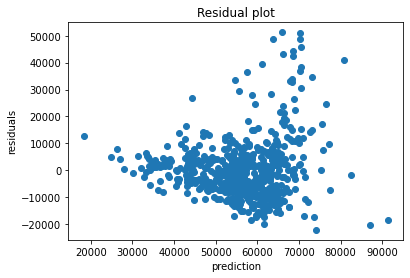

In [18]:
res = y_val - y_pred
plt.scatter(y_pred, res)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals")

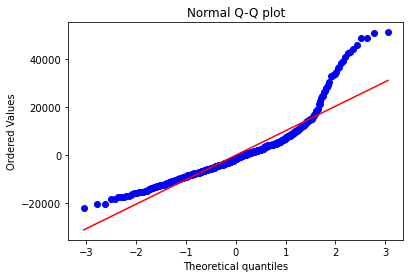

In [19]:
stats.probplot(res, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [20]:
## the target is skewed right and needs transformed
## that should help with randomness and distribution of residuals
## Also add kfold CV